# Calculate CESM Indeces

This file grabs the monthly CESM indeces, and calculates the averages for the time periods of interest (aka the warm season), as set in the _indexDefitionions file

You need to run 'calculateCesmMonthlyIndeces.ipnyb' first

Theres a few examples of output at the bottom to sanity check this is meaningful

In [16]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
from utils.timePeriod import averageForTimePeriod
#%run '../utils/timePeriod.ipynb'

In [17]:
import xarray
import matplotlib.pyplot as plt

In [18]:
_model.cesmAll

['0850cntl.001',
 'LME.002',
 'LME.003',
 'LME.008',
 'LME.009',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013']

In [19]:
timePIndeces=dict()

for experiment in _model.cesmAll:
    print(experiment)
    indeces = xarray.load_dataset('results/cesmFullForcingMonthlyIndeces/' + experiment + '.nc')

    timePIndeces[experiment] = averageForTimePeriod(indeces)



0850cntl.001
LME.002
LME.003
LME.008
LME.009
001
002
003
004
005
006
007
008
009
010
011
012
013


In [20]:
# so i've just written the results into a dict of pandas array. This is kinda funky because I can't slice one index across multiple models
# instead, put the whole thing into an xarray with a dimension for the experiment
results=xarray.concat(
    [
        xarray.DataArray(timePIndeces[experiment], 
                         dims=['year','index'], 
                         coords={
                             'year':timePIndeces[experiment].index,
                             'index':timePIndeces[experiment].columns,
                             'experiment': experiment})
    for experiment in _model.cesmFullForcings 
    ],
    dim='experiment'
)

results.assign_attrs(indeces.attrs)
results.assign_attrs(_index.monthsOfInterest)



<xarray.DataArray (experiment: 13, year: 1155, index: 8)>
array([[[ 1.17975917e+00,  1.80226056e+00,  1.98473338e+00, ...,
         -5.66380769e-02,  3.00423260e-01,  2.30253458e+00],
        [ 5.03691650e-01,  7.83807247e-01,  9.58287333e-01, ...,
         -1.00419866e+00,  1.31375491e+00,  6.98155940e-01],
        [ 6.41085110e-02,  5.19852274e-01,  7.89813737e-01, ...,
         -1.25415012e+00,  1.42445833e+00,  5.35333753e-02],
        ...,
        [ 2.24031248e-01,  3.06240177e-01,  2.83614794e-01, ...,
          9.24213632e-01, -4.22559595e-01,  1.64486015e+00],
        [-3.39359708e-01, -4.73715827e-01, -2.46069099e-01, ...,
         -6.85313725e-01,  1.02257443e+00, -2.57927537e+00],
        [ 4.33372259e-01,  3.82605110e-01,  4.30685177e-01, ...,
          3.18088886e-01,  3.66840854e-01, -6.69900998e-02]],

       [[ 2.95054683e-01,  5.74425913e-01,  6.66878639e-01, ...,
         -2.88996193e-01,  7.13505121e-01,  1.00106299e+00],
        [-5.62733934e-01, -4.57552471e-01, -4.19915641e-01, ...,
         -1.14692901e+00,  1.37608703e+00, -3.07206810e-01],
        [-5.43702777e-01, -7.22307521e-01, -7.21891003e-01, ...,
          2.53002097e-01, -3.35171583e-01, -2.69303888e-01],
...
        [ 6.79290535e-02,  8.18034672e-02, -9.65251417e-03, ...,
          1.05255590e+00, -7.82470655e-01, -8.47256184e-01],
        [ 7.58543112e-03, -1.01502692e-01,  1.12269093e-01, ...,
          6.73798255e-01, -2.31613106e-01, -1.28938401e+00],
        [-5.58145171e-01, -7.63306370e-01, -6.31626408e-01, ...,
          1.08995614e+00, -7.69954993e-01, -2.08657813e+00]],

       [[ 8.59695087e-01,  1.27949987e+00,  1.41621053e+00, ...,
         -4.29660124e-01,  7.33481762e-01, -1.09653866e+00],
        [-6.12512344e-01, -5.56396134e-01, -4.78454322e-01, ...,
         -7.74246356e-01,  1.11116763e+00, -2.15037560e+00],
        [-6.78880561e-01, -7.52830591e-01, -6.51630340e-01, ...,
          3.25286130e-01, -2.37162760e-01, -1.10537338e+00],
        ...,
        [ 2.07210936e-01, -5.03568985e-01, -3.94371606e-01, ...,
          1.40803976e+00, -3.46526033e-01, -2.06683946e+00],
        [-7.70736324e-01, -9.96344739e-01, -9.31629334e-01, ...,
          1.29270838e+00, -9.14454918e-01, -1.33671236e+00],
        [ 3.16547147e-01,  3.03834868e-01,  3.21161482e-01, ...,
          1.03820881e+00, -5.89642167e-01, -1.89095247e+00]]])
Coordinates:
  * year        (year) int64 850 851 852 853 854 ... 2000 2001 2002 2003 2004
  * index       (index) object 'nino12' 'nino3' ... 'indian_ocean_dipole' 'sam'
  * experiment  (experiment) object '001' '002' '003' ... '011' '012' '013'
Attributes:
    nino12:               [7, 15]
    nino3:                [7, 15]
    nino34:               [7, 15]
    nino4:                [7, 15]
    westIO:               [7, 12]
    eastIO:               [7, 12]
    indian_ocean_dipole:  [7, 15]
    sam:                  [10, 15]

In [21]:
results.to_netcdf('results/cesmTradIndeces.nc')

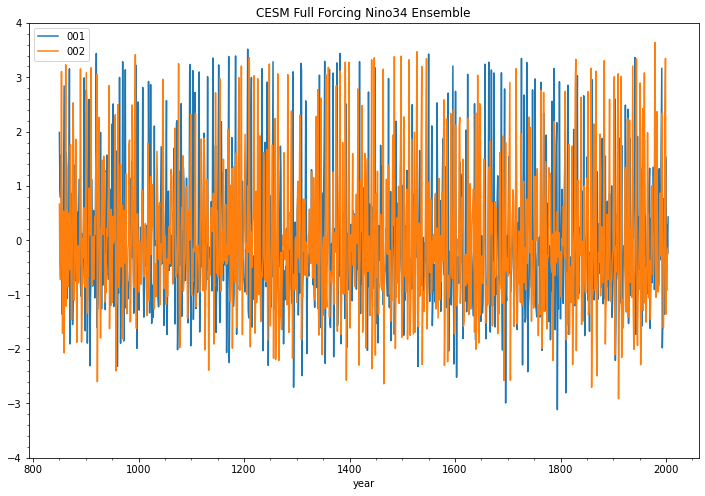

In [22]:
# plotSomething
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

results.sel(experiment='001', index='nino34').plot(label='001')
results.sel(experiment='002', index='nino34').plot(label='002')

#Tidy up a bit
plt.title("CESM Full Forcing Nino34 Ensemble")
plt.ylim(-4,4)
plt.minorticks_on()
plt.legend()

In [23]:
# A multi-experiment mean?

mean = results.sel(index='nino34').mean(dim='experiment')
std = results.sel(index='nino34').std(dim='experiment')

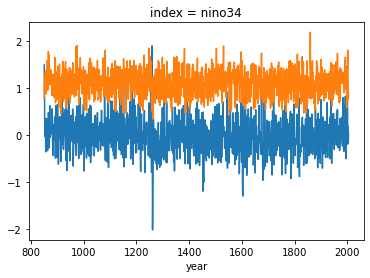

In [24]:
plt.figure()
mean.plot()
std.plot()

In [25]:
# why limit yourself to one index?

mean = results.sel(experiment=_model.cesmFullForcings).mean(dim='experiment')
std = results.sel(experiment=_model.cesmFullForcings).std(dim='experiment')

In [26]:
std

<xarray.DataArray (year: 1155, index: 8)>
array([[0.63968745, 0.80312231, 0.8064406 , ..., 0.71575744, 0.73960053,
        1.2969699 ],
       [1.24993311, 1.51452615, 1.29556262, ..., 0.68925886, 0.70636665,
        1.58378491],
       [0.76313561, 1.21568898, 1.30686555, ..., 0.81366937, 0.83294454,
        1.39370716],
       ...,
       [0.81071225, 1.25641178, 1.36004357, ..., 1.05905319, 1.11179354,
        0.97237368],
       [0.66379616, 0.75015285, 0.76893194, ..., 0.54274125, 0.6053811 ,
        0.6472482 ],
       [0.59821829, 0.82010484, 0.89115742, ..., 0.44409257, 0.56917734,
        0.80694405]])
Coordinates:
  * year     (year) int64 850 851 852 853 854 855 ... 2000 2001 2002 2003 2004
  * index    (index) object 'nino12' 'nino3' ... 'indian_ocean_dipole' 'sam'